In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

# Load and inspect the dataset
data_path = '/Users/anika/Library/CloudStorage/OneDrive-reutlingen-university.de/Dokumente/Uni/DCU/7. Semester/Data Analytics/Business Portfolio/apple_quality.csv'
apple_data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
apple_data.head(), apple_data.info(), apple_data.describe()

# Convert 'Acidity' to numeric, handling errors by coercing them to NaN
apple_data['Acidity'] = pd.to_numeric(apple_data['Acidity'], errors='coerce')

# Fill missing values in the dataset
# Ensure to only compute the mean for numeric columns
numeric_columns = apple_data.select_dtypes(include=[float, int]).columns
apple_data[numeric_columns] = apple_data[numeric_columns].fillna(apple_data[numeric_columns].mean())

# Encode the 'Quality' column as it should be treated as a categorical feature
label_encoder = LabelEncoder()
apple_data['Quality'] = label_encoder.fit_transform(apple_data['Quality'].astype(str))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [8]:
# Data preprocessing
apple_data['Acidity'] = pd.to_numeric(apple_data['Acidity'], errors='coerce')
apple_data.dropna(subset=['A_id'], inplace=True)
apple_data.fillna(apple_data.mean(), inplace=True)

# Feature engineering with polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
features_columns = apple_data.columns.drop(['A_id', 'Quality'])
poly_features = poly.fit_transform(apple_data[features_columns])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features_columns))
enhanced_apple_data = pd.concat([apple_data[['A_id', 'Quality']], poly_features_df], axis=1)




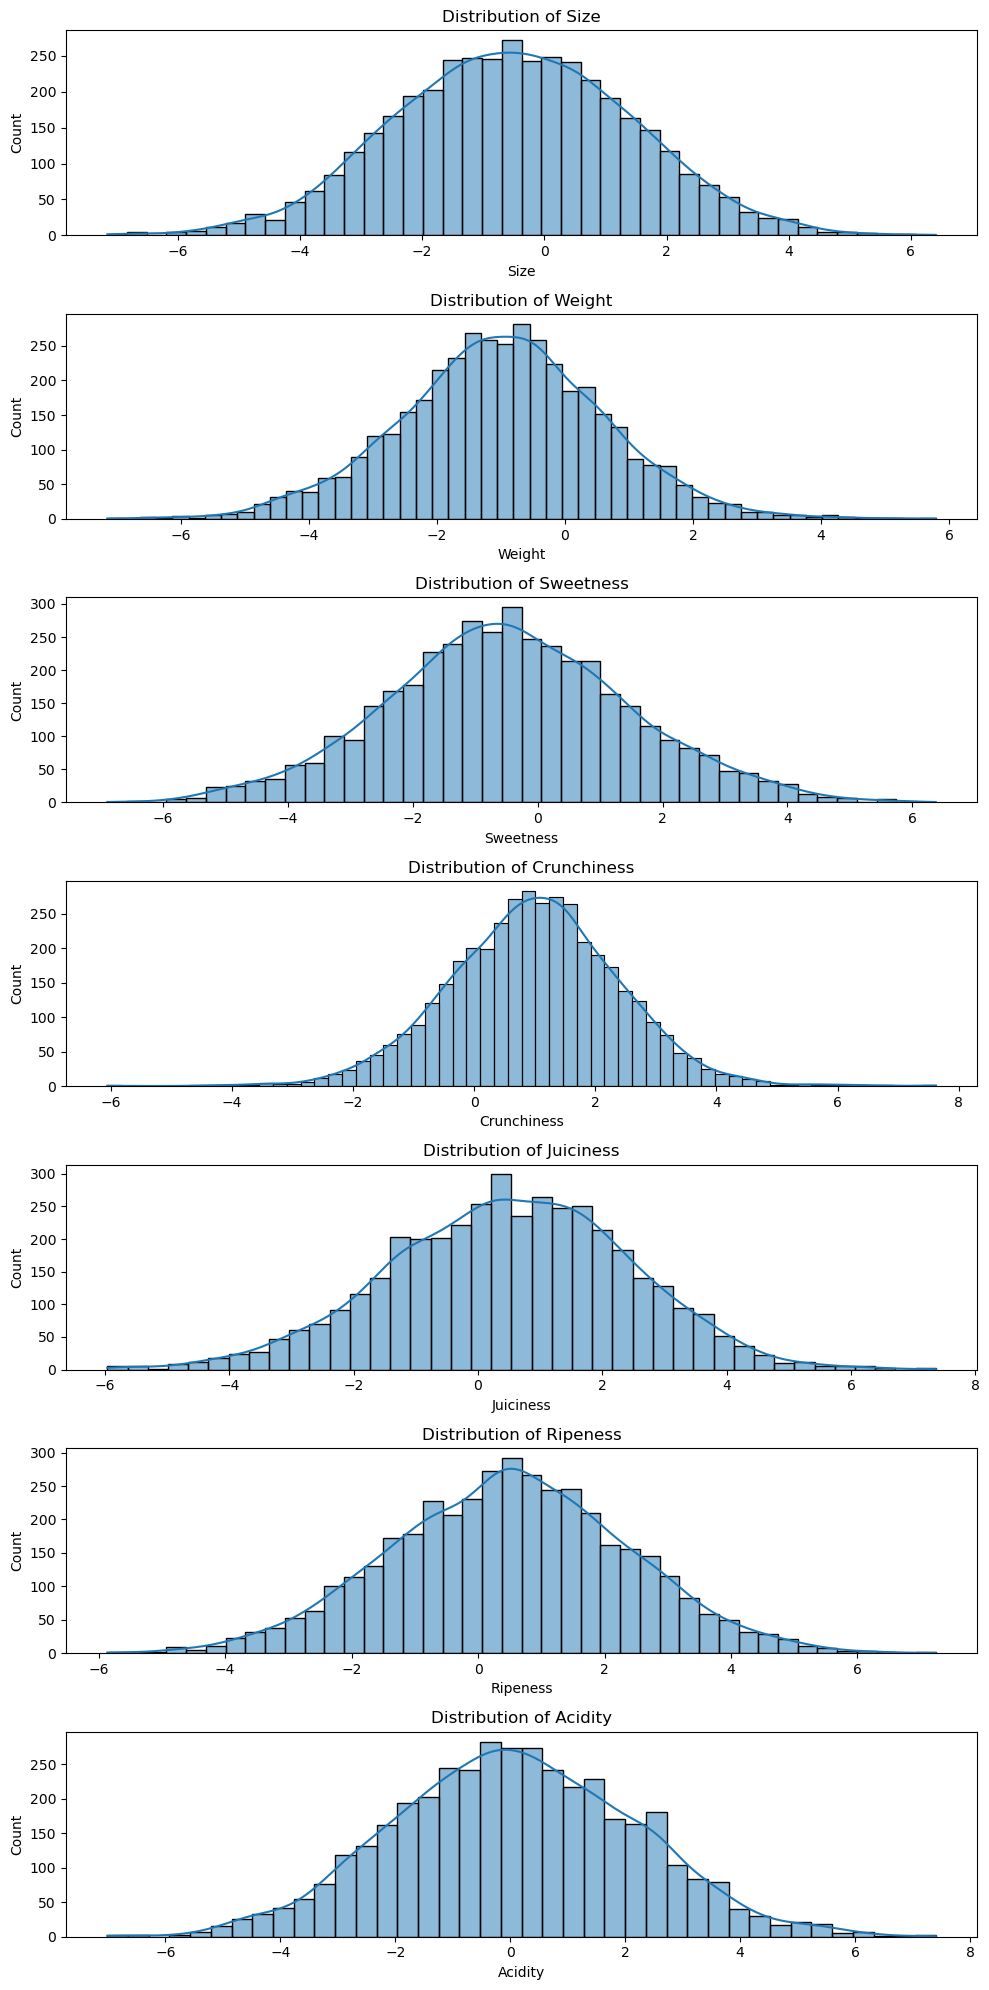

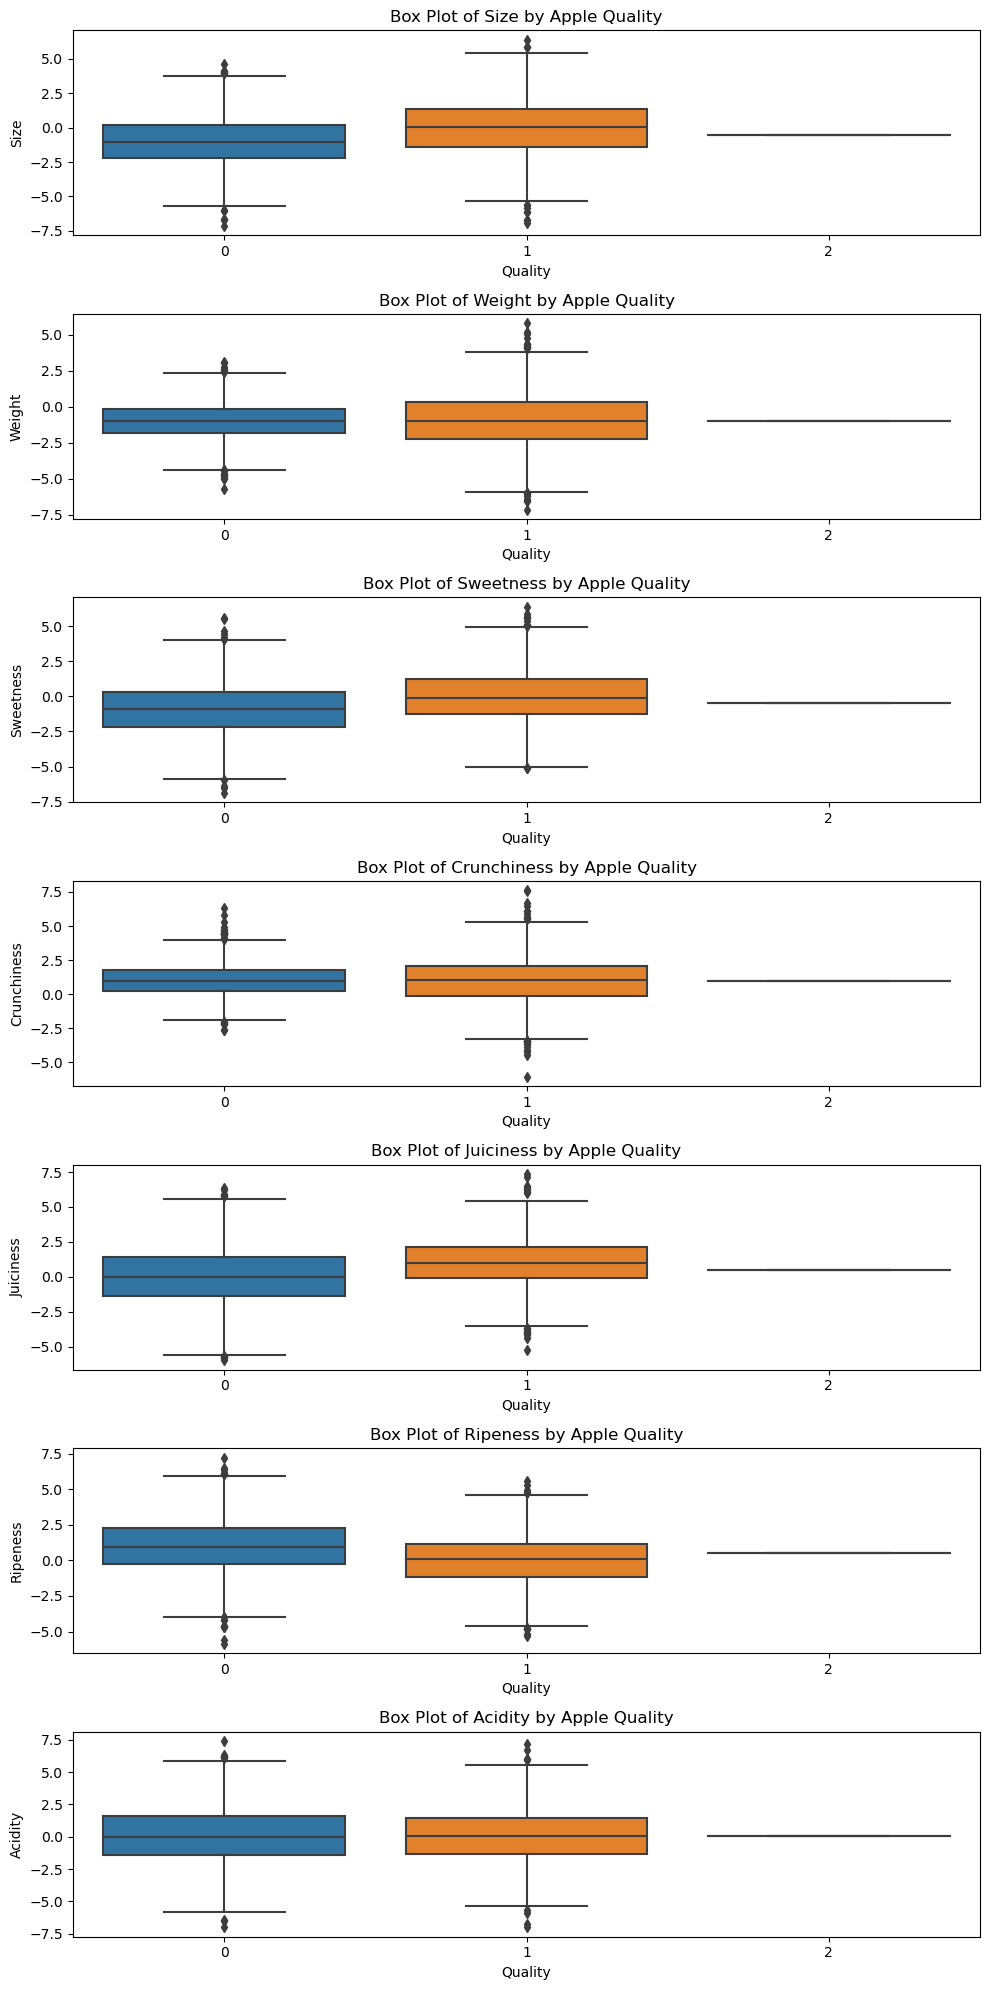

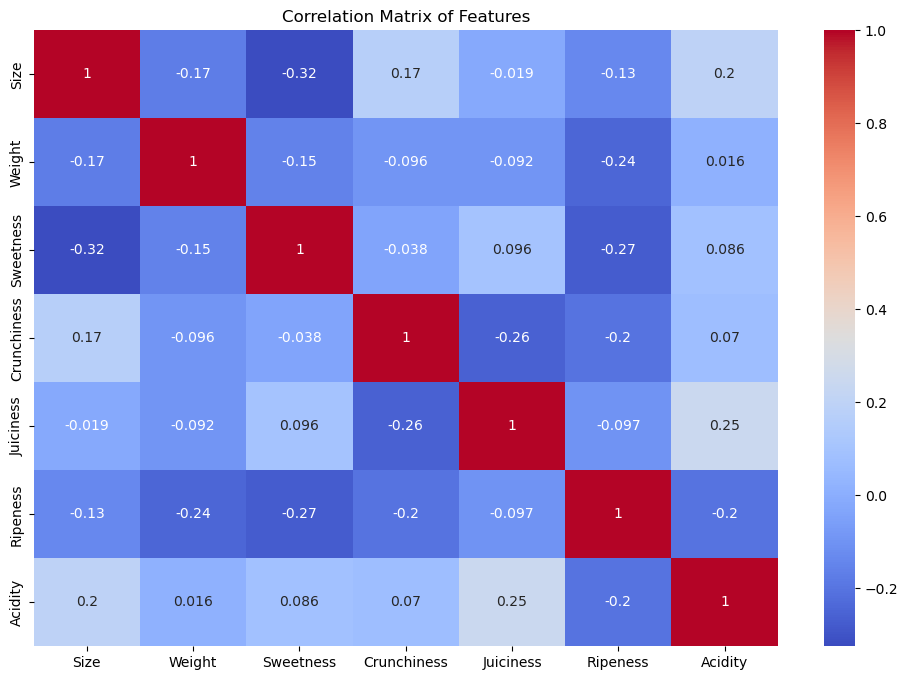

In [9]:
# EDA: Visualizing distributions of features
distribution_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
fig, axes = plt.subplots(len(distribution_features), 1, figsize=(10, 20))
for i, feature in enumerate(distribution_features):
    sns.histplot(apple_data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()

# EDA: Box plots for features by apple quality
fig, axes = plt.subplots(len(distribution_features), 1, figsize=(10, 20))
for i, feature in enumerate(distribution_features):
    sns.boxplot(x='Quality', y=feature, data=apple_data, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Apple Quality')
plt.tight_layout()

# EDA: Correlation matrix
correlation_matrix = apple_data[distribution_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


In [10]:
# Descriptive statistics for the dataset
descriptive_stats = apple_data.describe()
descriptive_stats


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501375
std,1154.700502,1.927818,1.602307,1.943198,1.402582,1.930044,1.874192,2.110006,0.500560
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,1000.000000,-1.816202,-2.011767,-1.738424,0.062865,-0.801238,-0.770970,-1.377338,0.000000
50%,1999.500000,-0.513569,-0.984984,-0.504307,0.997933,0.533504,0.502737,0.022797,1.000000
75%,2999.000000,0.805329,0.029773,0.801810,1.893586,1.835903,1.765281,1.510439,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,2.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Label encoding for the categorical target variable 'Quality'
label_encoder = LabelEncoder()
apple_data['Quality'] = label_encoder.fit_transform(apple_data['Quality'])

# Features and target variable
X = apple_data.drop(['A_id', 'Quality'], axis=1)
y = apple_data['Quality']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# K-means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

# Performance of the Random Forest
from sklearn.metrics import classification_report, accuracy_score
y_pred = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred)

rf_accuracy, rf_report, kmeans.labels_[:10]  # Show some cluster labels as a sample


/Users/anika/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.8951310861423221,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.91      0.89       391\n           1       0.91      0.89      0.90       410\n\n    accuracy                           0.90       801\n   macro avg       0.90      0.90      0.90       801\nweighted avg       0.90      0.90      0.90       801\n',
 array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int32))

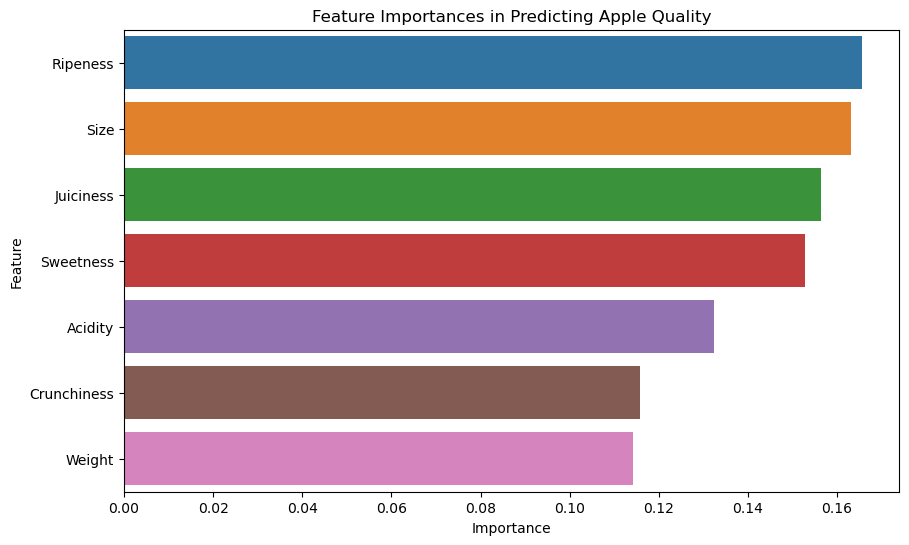

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Prepare the data
X = apple_data.drop(['A_id', 'Quality'], axis=1)
y = apple_data['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature Importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Predicting Apple Quality')
plt.show()

/Users/anika/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.86875   0.8703125 0.8984375 0.875     0.875    ]
Average score: 0.8775000000000001


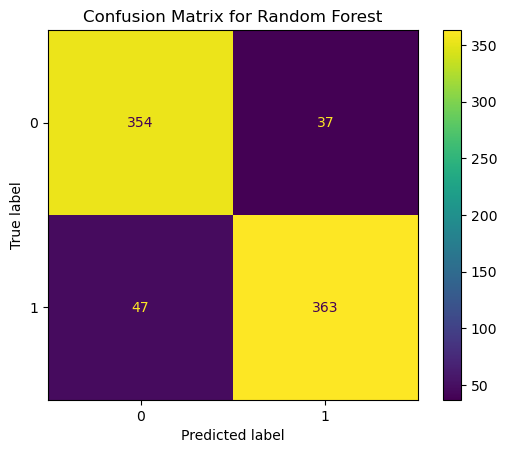

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cross-validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average score:", cv_scores.mean())




# Assuming data preprocessing is already done and y_train, y_test are available
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict the test set
y_pred = rf.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

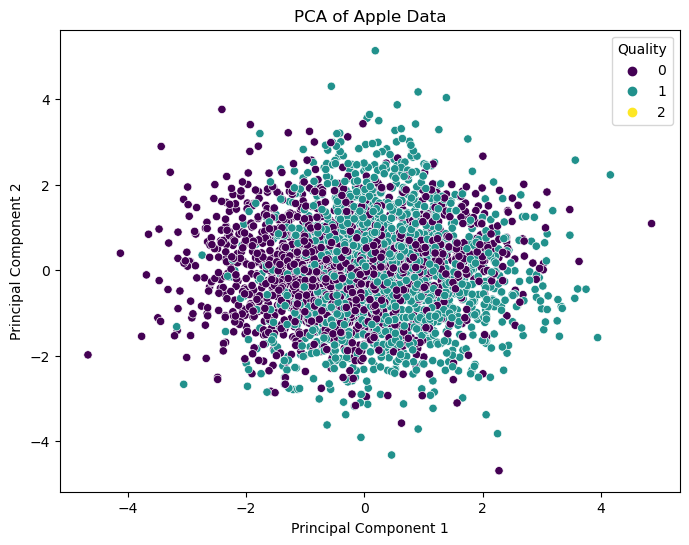

In [18]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Reduce to two dimensions for visualization
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis')
plt.title('PCA of Apple Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality')
plt.show()


In [16]:
import sklearn
print(sklearn.__version__)


1.3.0
